In [1]:
#import tensorflow and other libraries

import matplotlib.pyplot as plt
import os
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import pandas as pd
from scipy import ndimage
from sklearn.metrics import accuracy_score
import tensorflow as tf
from scipy.misc import imread
from PIL import Image, ImageFilter
import cv2
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
#Testing Tensorflow . it is not part of the project
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

addition = tf.add(a, b)

# initialize variables
init = tf.global_variables_initializer()

# create session and run the graph
with tf.Session() as sess:
    sess.run(init)
    print ("Addition: %.1f" % sess.run(addition, feed_dict={a: 4, b: 3}))

# close session
sess.close()

Addition: 7.0


Let's seed value.  
To control our model's Randomness

In [3]:
seed=128
rng = np.random.RandomState(seed)

In [4]:
# Let's create the graph input of tensorflow by defining the 'Place Holders'
data_img_shape = 28*28  # 784 input units
digit_recognition = 10  # 10 classes : 0-9 digits or output units
hidden_num_units = 500  # hidden layer units

x = tf.placeholder(tf.float32,[None,data_img_shape])
y = tf.placeholder(tf.float32,[None,digit_recognition])

epochs = 5
batch_size = 128
learning_rate = 0.01
training_iteration = 50

# Let's define weights and biases of our model

# weights are the probablity that affects how data flow in the graph and 
# it will be updated continously during training
# so that our results will be closer to the right solution
weights = {
    'hidden' : tf.Variable(tf.random_normal([data_img_shape,hidden_num_units],seed=seed)),
    'output' : tf.Variable(tf.random_normal([hidden_num_units,digit_recognition],seed=seed))
}

# bias is to shift our regression line to better fit the data 
biases = {
     'hidden' : tf.Variable(tf.random_normal([hidden_num_units],seed=seed)),
     'output' : tf.Variable(tf.random_normal([digit_recognition],seed=seed))
}

# let's create our neural network computaional graph 

hidden_layer = tf.add(tf.matmul(x,weights['hidden']),biases['hidden'])
hidden_layer = tf.nn.relu(hidden_layer)

output_layer = tf.add(tf.matmul(hidden_layer,weights['output']),biases['output'])

# let's define our cost function 
# cost function minimize our erroe during training
# we will use cross entropy method to define the cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = output_layer, labels = y))


# let's set the optimizer i.e our backpropagation algorithim
# Here we use Adam, which is an efficient variant of Gradient Descent algorithm
# optimizer makes our model self improve through the training

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# We finish the architecture of our neural network
# nOw we will initialize all the variables



In [5]:
# Let's create an session and run our neural network in that session to train it

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

for iteration in range(10000):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(50):
        batch_x,batch_y =  mnist.train.next_batch(50)  # create pre-processed batch
        _,c = sess.run([optimizer,cost],feed_dict = {x:batch_x , y:batch_y})   # feed the batch to optimizer
            
        avg_cost += c / total_batch          #find cost and reiterate to minimize
            
    print ("iteration :", (iteration+1), "cost =", "{:.5f}".format(avg_cost))
print ("\nTraining complete!")
    
pred_temp = tf.equal(tf.argmax(output_layer,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(pred_temp,'float'))

    
#print ("Validation Accuracy:", accuracy.eval({x:mnist.test.images, y: mnist.test.labels}))   
print ("Validation Accuracy:", sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})) 
    

iteration : 1 cost = 5.46106
iteration : 2 cost = 1.50625
iteration : 3 cost = 1.35528
iteration : 4 cost = 1.15099
iteration : 5 cost = 0.83103
iteration : 6 cost = 0.68617
iteration : 7 cost = 0.72353
iteration : 8 cost = 0.64845
iteration : 9 cost = 0.58834
iteration : 10 cost = 0.54910
iteration : 11 cost = 0.52417
iteration : 12 cost = 0.50610
iteration : 13 cost = 0.44444
iteration : 14 cost = 0.40419
iteration : 15 cost = 0.40266
iteration : 16 cost = 0.35090
iteration : 17 cost = 0.40950
iteration : 18 cost = 0.35298
iteration : 19 cost = 0.36021
iteration : 20 cost = 0.32498
iteration : 21 cost = 0.35203
iteration : 22 cost = 0.27810
iteration : 23 cost = 0.18556
iteration : 24 cost = 0.19240
iteration : 25 cost = 0.14003
iteration : 26 cost = 0.14683
iteration : 27 cost = 0.16218
iteration : 28 cost = 0.18040
iteration : 29 cost = 0.13467
iteration : 30 cost = 0.14147
iteration : 31 cost = 0.16135
iteration : 32 cost = 0.15891
iteration : 33 cost = 0.11296
iteration : 34 cost

iteration : 269 cost = 0.02469
iteration : 270 cost = 0.01927
iteration : 271 cost = 0.01586
iteration : 272 cost = 0.04718
iteration : 273 cost = 0.01887
iteration : 274 cost = 0.01955
iteration : 275 cost = 0.02785
iteration : 276 cost = 0.01969
iteration : 277 cost = 0.02463
iteration : 278 cost = 0.02164
iteration : 279 cost = 0.02691
iteration : 280 cost = 0.01535
iteration : 281 cost = 0.02014
iteration : 282 cost = 0.02300
iteration : 283 cost = 0.02058
iteration : 284 cost = 0.02911
iteration : 285 cost = 0.02833
iteration : 286 cost = 0.02406
iteration : 287 cost = 0.02154
iteration : 288 cost = 0.01449
iteration : 289 cost = 0.01519
iteration : 290 cost = 0.01974
iteration : 291 cost = 0.01886
iteration : 292 cost = 0.01689
iteration : 293 cost = 0.03060
iteration : 294 cost = 0.02153
iteration : 295 cost = 0.02953
iteration : 296 cost = 0.02648
iteration : 297 cost = 0.02554
iteration : 298 cost = 0.03001
iteration : 299 cost = 0.01853
iteration : 300 cost = 0.01879
iteratio

iteration : 534 cost = 0.01109
iteration : 535 cost = 0.01496
iteration : 536 cost = 0.02038
iteration : 537 cost = 0.01093
iteration : 538 cost = 0.01311
iteration : 539 cost = 0.01946
iteration : 540 cost = 0.01997
iteration : 541 cost = 0.01616
iteration : 542 cost = 0.02948
iteration : 543 cost = 0.01172
iteration : 544 cost = 0.01966
iteration : 545 cost = 0.01674
iteration : 546 cost = 0.04184
iteration : 547 cost = 0.01706
iteration : 548 cost = 0.01291
iteration : 549 cost = 0.01185
iteration : 550 cost = 0.00973
iteration : 551 cost = 0.01587
iteration : 552 cost = 0.01276
iteration : 553 cost = 0.01367
iteration : 554 cost = 0.01326
iteration : 555 cost = 0.00828
iteration : 556 cost = 0.01470
iteration : 557 cost = 0.00624
iteration : 558 cost = 0.01473
iteration : 559 cost = 0.02025
iteration : 560 cost = 0.01432
iteration : 561 cost = 0.02588
iteration : 562 cost = 0.02828
iteration : 563 cost = 0.03399
iteration : 564 cost = 0.02266
iteration : 565 cost = 0.01686
iteratio

iteration : 799 cost = 0.00892
iteration : 800 cost = 0.02240
iteration : 801 cost = 0.01995
iteration : 802 cost = 0.00834
iteration : 803 cost = 0.00955
iteration : 804 cost = 0.00533
iteration : 805 cost = 0.01609
iteration : 806 cost = 0.02431
iteration : 807 cost = 0.01015
iteration : 808 cost = 0.01685
iteration : 809 cost = 0.00967
iteration : 810 cost = 0.01073
iteration : 811 cost = 0.02591
iteration : 812 cost = 0.01297
iteration : 813 cost = 0.01199
iteration : 814 cost = 0.01576
iteration : 815 cost = 0.01217
iteration : 816 cost = 0.00601
iteration : 817 cost = 0.00229
iteration : 818 cost = 0.00632
iteration : 819 cost = 0.01130
iteration : 820 cost = 0.00863
iteration : 821 cost = 0.01409
iteration : 822 cost = 0.01288
iteration : 823 cost = 0.01034
iteration : 824 cost = 0.00733
iteration : 825 cost = 0.00537
iteration : 826 cost = 0.01612
iteration : 827 cost = 0.01201
iteration : 828 cost = 0.01843
iteration : 829 cost = 0.01881
iteration : 830 cost = 0.02768
iteratio

iteration : 1062 cost = 0.01290
iteration : 1063 cost = 0.01190
iteration : 1064 cost = 0.00579
iteration : 1065 cost = 0.00572
iteration : 1066 cost = 0.00628
iteration : 1067 cost = 0.00697
iteration : 1068 cost = 0.01123
iteration : 1069 cost = 0.00945
iteration : 1070 cost = 0.01314
iteration : 1071 cost = 0.00847
iteration : 1072 cost = 0.00995
iteration : 1073 cost = 0.01793
iteration : 1074 cost = 0.01153
iteration : 1075 cost = 0.02028
iteration : 1076 cost = 0.03699
iteration : 1077 cost = 0.02841
iteration : 1078 cost = 0.02520
iteration : 1079 cost = 0.01758
iteration : 1080 cost = 0.00085
iteration : 1081 cost = 0.01101
iteration : 1082 cost = 0.01760
iteration : 1083 cost = 0.00875
iteration : 1084 cost = 0.01104
iteration : 1085 cost = 0.00897
iteration : 1086 cost = 0.01799
iteration : 1087 cost = 0.01071
iteration : 1088 cost = 0.01128
iteration : 1089 cost = 0.00881
iteration : 1090 cost = 0.00529
iteration : 1091 cost = 0.00563
iteration : 1092 cost = 0.01685
iteratio

iteration : 1319 cost = 0.00561
iteration : 1320 cost = 0.01236
iteration : 1321 cost = 0.01220
iteration : 1322 cost = 0.01543
iteration : 1323 cost = 0.00943
iteration : 1324 cost = 0.02066
iteration : 1325 cost = 0.01161
iteration : 1326 cost = 0.00159
iteration : 1327 cost = 0.01327
iteration : 1328 cost = 0.01181
iteration : 1329 cost = 0.01149
iteration : 1330 cost = 0.00811
iteration : 1331 cost = 0.00921
iteration : 1332 cost = 0.00722
iteration : 1333 cost = 0.01714
iteration : 1334 cost = 0.00479
iteration : 1335 cost = 0.01379
iteration : 1336 cost = 0.01118
iteration : 1337 cost = 0.00879
iteration : 1338 cost = 0.01230
iteration : 1339 cost = 0.01232
iteration : 1340 cost = 0.01321
iteration : 1341 cost = 0.00625
iteration : 1342 cost = 0.00761
iteration : 1343 cost = 0.00796
iteration : 1344 cost = 0.00525
iteration : 1345 cost = 0.01032
iteration : 1346 cost = 0.01121
iteration : 1347 cost = 0.01928
iteration : 1348 cost = 0.01743
iteration : 1349 cost = 0.01316
iteratio

iteration : 1576 cost = 0.01640
iteration : 1577 cost = 0.00244
iteration : 1578 cost = 0.00539
iteration : 1579 cost = 0.00990
iteration : 1580 cost = 0.00628
iteration : 1581 cost = 0.01794
iteration : 1582 cost = 0.01818
iteration : 1583 cost = 0.02696
iteration : 1584 cost = 0.01466
iteration : 1585 cost = 0.00419
iteration : 1586 cost = 0.01197
iteration : 1587 cost = 0.02378
iteration : 1588 cost = 0.01255
iteration : 1589 cost = 0.01530
iteration : 1590 cost = 0.02258
iteration : 1591 cost = 0.01241
iteration : 1592 cost = 0.00671
iteration : 1593 cost = 0.01180
iteration : 1594 cost = 0.01270
iteration : 1595 cost = 0.01177
iteration : 1596 cost = 0.02848
iteration : 1597 cost = 0.02356
iteration : 1598 cost = 0.02937
iteration : 1599 cost = 0.00263
iteration : 1600 cost = 0.02099
iteration : 1601 cost = 0.00979
iteration : 1602 cost = 0.01041
iteration : 1603 cost = 0.00792
iteration : 1604 cost = 0.00798
iteration : 1605 cost = 0.01824
iteration : 1606 cost = 0.00403
iteratio

iteration : 1833 cost = 0.00136
iteration : 1834 cost = 0.00094
iteration : 1835 cost = 0.00483
iteration : 1836 cost = 0.00993
iteration : 1837 cost = 0.01186
iteration : 1838 cost = 0.01521
iteration : 1839 cost = 0.00427
iteration : 1840 cost = 0.00296
iteration : 1841 cost = 0.01680
iteration : 1842 cost = 0.01390
iteration : 1843 cost = 0.01537
iteration : 1844 cost = 0.00406
iteration : 1845 cost = 0.00197
iteration : 1846 cost = 0.00628
iteration : 1847 cost = 0.00957
iteration : 1848 cost = 0.00146
iteration : 1849 cost = 0.00869
iteration : 1850 cost = 0.00296
iteration : 1851 cost = 0.00542
iteration : 1852 cost = 0.00956
iteration : 1853 cost = 0.00707
iteration : 1854 cost = 0.00652
iteration : 1855 cost = 0.00265
iteration : 1856 cost = 0.00069
iteration : 1857 cost = 0.00759
iteration : 1858 cost = 0.01044
iteration : 1859 cost = 0.03009
iteration : 1860 cost = 0.02366
iteration : 1861 cost = 0.00604
iteration : 1862 cost = 0.03019
iteration : 1863 cost = 0.01234
iteratio

iteration : 2090 cost = 0.02564
iteration : 2091 cost = 0.01131
iteration : 2092 cost = 0.00251
iteration : 2093 cost = 0.00427
iteration : 2094 cost = 0.01207
iteration : 2095 cost = 0.00723
iteration : 2096 cost = 0.00460
iteration : 2097 cost = 0.00658
iteration : 2098 cost = 0.00405
iteration : 2099 cost = 0.00194
iteration : 2100 cost = 0.00867
iteration : 2101 cost = 0.00718
iteration : 2102 cost = 0.00542
iteration : 2103 cost = 0.00408
iteration : 2104 cost = 0.00673
iteration : 2105 cost = 0.00307
iteration : 2106 cost = 0.01481
iteration : 2107 cost = 0.01879
iteration : 2108 cost = 0.00133
iteration : 2109 cost = 0.00242
iteration : 2110 cost = 0.00730
iteration : 2111 cost = 0.01349
iteration : 2112 cost = 0.01623
iteration : 2113 cost = 0.00485
iteration : 2114 cost = 0.00697
iteration : 2115 cost = 0.00393
iteration : 2116 cost = 0.01240
iteration : 2117 cost = 0.00434
iteration : 2118 cost = 0.01166
iteration : 2119 cost = 0.00701
iteration : 2120 cost = 0.00441
iteratio

iteration : 2347 cost = 0.01052
iteration : 2348 cost = 0.01453
iteration : 2349 cost = 0.00605
iteration : 2350 cost = 0.00637
iteration : 2351 cost = 0.01330
iteration : 2352 cost = 0.00994
iteration : 2353 cost = 0.01983
iteration : 2354 cost = 0.01120
iteration : 2355 cost = 0.01908
iteration : 2356 cost = 0.01478
iteration : 2357 cost = 0.01196
iteration : 2358 cost = 0.00382
iteration : 2359 cost = 0.01474
iteration : 2360 cost = 0.00217
iteration : 2361 cost = 0.00809
iteration : 2362 cost = 0.00554
iteration : 2363 cost = 0.00360
iteration : 2364 cost = 0.00001
iteration : 2365 cost = 0.00950
iteration : 2366 cost = 0.00144
iteration : 2367 cost = 0.00647
iteration : 2368 cost = 0.00025
iteration : 2369 cost = 0.00736
iteration : 2370 cost = 0.02200
iteration : 2371 cost = 0.01479
iteration : 2372 cost = 0.01731
iteration : 2373 cost = 0.02284
iteration : 2374 cost = 0.00927
iteration : 2375 cost = 0.00370
iteration : 2376 cost = 0.00929
iteration : 2377 cost = 0.00913
iteratio

iteration : 2604 cost = 0.00283
iteration : 2605 cost = 0.02991
iteration : 2606 cost = 0.02099
iteration : 2607 cost = 0.01785
iteration : 2608 cost = 0.01192
iteration : 2609 cost = 0.01112
iteration : 2610 cost = 0.00630
iteration : 2611 cost = 0.02195
iteration : 2612 cost = 0.00547
iteration : 2613 cost = 0.00647
iteration : 2614 cost = 0.02014
iteration : 2615 cost = 0.00373
iteration : 2616 cost = 0.02439
iteration : 2617 cost = 0.01015
iteration : 2618 cost = 0.00213
iteration : 2619 cost = 0.02086
iteration : 2620 cost = 0.03382
iteration : 2621 cost = 0.00742
iteration : 2622 cost = 0.00995
iteration : 2623 cost = 0.00493
iteration : 2624 cost = 0.01209
iteration : 2625 cost = 0.00097
iteration : 2626 cost = 0.00779
iteration : 2627 cost = 0.00423
iteration : 2628 cost = 0.00827
iteration : 2629 cost = 0.00476
iteration : 2630 cost = 0.01031
iteration : 2631 cost = 0.01782
iteration : 2632 cost = 0.02810
iteration : 2633 cost = 0.00264
iteration : 2634 cost = 0.00517
iteratio

iteration : 2861 cost = 0.00514
iteration : 2862 cost = 0.00646
iteration : 2863 cost = 0.00538
iteration : 2864 cost = 0.00088
iteration : 2865 cost = 0.00530
iteration : 2866 cost = 0.00249
iteration : 2867 cost = 0.00193
iteration : 2868 cost = 0.00000
iteration : 2869 cost = 0.00651
iteration : 2870 cost = 0.00109
iteration : 2871 cost = 0.01006
iteration : 2872 cost = 0.01549
iteration : 2873 cost = 0.00060
iteration : 2874 cost = 0.00586
iteration : 2875 cost = 0.01362
iteration : 2876 cost = 0.01188
iteration : 2877 cost = 0.01043
iteration : 2878 cost = 0.00171
iteration : 2879 cost = 0.00019
iteration : 2880 cost = 0.00461
iteration : 2881 cost = 0.00723
iteration : 2882 cost = 0.00447
iteration : 2883 cost = 0.00611
iteration : 2884 cost = 0.00011
iteration : 2885 cost = 0.00199
iteration : 2886 cost = 0.00078
iteration : 2887 cost = 0.00893
iteration : 2888 cost = 0.00503
iteration : 2889 cost = 0.00341
iteration : 2890 cost = 0.01842
iteration : 2891 cost = 0.00687
iteratio

iteration : 3118 cost = 0.01211
iteration : 3119 cost = 0.01418
iteration : 3120 cost = 0.00204
iteration : 3121 cost = 0.01186
iteration : 3122 cost = 0.00015
iteration : 3123 cost = 0.00926
iteration : 3124 cost = 0.00468
iteration : 3125 cost = 0.00143
iteration : 3126 cost = 0.00911
iteration : 3127 cost = 0.01556
iteration : 3128 cost = 0.03046
iteration : 3129 cost = 0.02077
iteration : 3130 cost = 0.01794
iteration : 3131 cost = 0.00778
iteration : 3132 cost = 0.03294
iteration : 3133 cost = 0.00156
iteration : 3134 cost = 0.01350
iteration : 3135 cost = 0.00564
iteration : 3136 cost = 0.00550
iteration : 3137 cost = 0.00780
iteration : 3138 cost = 0.01603
iteration : 3139 cost = 0.00903
iteration : 3140 cost = 0.00360
iteration : 3141 cost = 0.01382
iteration : 3142 cost = 0.00000
iteration : 3143 cost = 0.00934
iteration : 3144 cost = 0.00043
iteration : 3145 cost = 0.00847
iteration : 3146 cost = 0.00683
iteration : 3147 cost = 0.00066
iteration : 3148 cost = 0.00011
iteratio

iteration : 3375 cost = 0.01314
iteration : 3376 cost = 0.00418
iteration : 3377 cost = 0.02099
iteration : 3378 cost = 0.01486
iteration : 3379 cost = 0.01704
iteration : 3380 cost = 0.00132
iteration : 3381 cost = 0.01062
iteration : 3382 cost = 0.01154
iteration : 3383 cost = 0.01843
iteration : 3384 cost = 0.00827
iteration : 3385 cost = 0.00832
iteration : 3386 cost = 0.00049
iteration : 3387 cost = 0.00014
iteration : 3388 cost = 0.01693
iteration : 3389 cost = 0.00000
iteration : 3390 cost = 0.01074
iteration : 3391 cost = 0.00307
iteration : 3392 cost = 0.00584
iteration : 3393 cost = 0.00380
iteration : 3394 cost = 0.00148
iteration : 3395 cost = 0.00847
iteration : 3396 cost = 0.00877
iteration : 3397 cost = 0.01243
iteration : 3398 cost = 0.00000
iteration : 3399 cost = 0.00350
iteration : 3400 cost = 0.01655
iteration : 3401 cost = 0.00012
iteration : 3402 cost = 0.01433
iteration : 3403 cost = 0.00438
iteration : 3404 cost = 0.00520
iteration : 3405 cost = 0.00501
iteratio

iteration : 3632 cost = 0.00695
iteration : 3633 cost = 0.00000
iteration : 3634 cost = 0.00000
iteration : 3635 cost = 0.00809
iteration : 3636 cost = 0.00395
iteration : 3637 cost = 0.00585
iteration : 3638 cost = 0.00000
iteration : 3639 cost = 0.00500
iteration : 3640 cost = 0.00160
iteration : 3641 cost = 0.00900
iteration : 3642 cost = 0.00000
iteration : 3643 cost = 0.01636
iteration : 3644 cost = 0.00410
iteration : 3645 cost = 0.00067
iteration : 3646 cost = 0.00531
iteration : 3647 cost = 0.02181
iteration : 3648 cost = 0.01131
iteration : 3649 cost = 0.00232
iteration : 3650 cost = 0.00916
iteration : 3651 cost = 0.02755
iteration : 3652 cost = 0.01013
iteration : 3653 cost = 0.01467
iteration : 3654 cost = 0.00668
iteration : 3655 cost = 0.01636
iteration : 3656 cost = 0.01389
iteration : 3657 cost = 0.00523
iteration : 3658 cost = 0.01311
iteration : 3659 cost = 0.01771
iteration : 3660 cost = 0.00728
iteration : 3661 cost = 0.00809
iteration : 3662 cost = 0.00706
iteratio

iteration : 3889 cost = 0.01975
iteration : 3890 cost = 0.02158
iteration : 3891 cost = 0.02119
iteration : 3892 cost = 0.00036
iteration : 3893 cost = 0.00074
iteration : 3894 cost = 0.00000
iteration : 3895 cost = 0.00431
iteration : 3896 cost = 0.00000
iteration : 3897 cost = 0.00037
iteration : 3898 cost = 0.00000
iteration : 3899 cost = 0.00678
iteration : 3900 cost = 0.00145
iteration : 3901 cost = 0.00179
iteration : 3902 cost = 0.00747
iteration : 3903 cost = 0.00580
iteration : 3904 cost = 0.00879
iteration : 3905 cost = 0.00386
iteration : 3906 cost = 0.00399
iteration : 3907 cost = 0.00768
iteration : 3908 cost = 0.00678
iteration : 3909 cost = 0.00976
iteration : 3910 cost = 0.00216
iteration : 3911 cost = 0.02419
iteration : 3912 cost = 0.00838
iteration : 3913 cost = 0.00805
iteration : 3914 cost = 0.00768
iteration : 3915 cost = 0.01099
iteration : 3916 cost = 0.01655
iteration : 3917 cost = 0.01197
iteration : 3918 cost = 0.02534
iteration : 3919 cost = 0.00714
iteratio

iteration : 4146 cost = 0.00021
iteration : 4147 cost = 0.00018
iteration : 4148 cost = 0.00000
iteration : 4149 cost = 0.00816
iteration : 4150 cost = 0.01135
iteration : 4151 cost = 0.00642
iteration : 4152 cost = 0.00000
iteration : 4153 cost = 0.01216
iteration : 4154 cost = 0.00524
iteration : 4155 cost = 0.01425
iteration : 4156 cost = 0.02220
iteration : 4157 cost = 0.01199
iteration : 4158 cost = 0.00602
iteration : 4159 cost = 0.00028
iteration : 4160 cost = 0.00058
iteration : 4161 cost = 0.00346
iteration : 4162 cost = 0.00225
iteration : 4163 cost = 0.00930
iteration : 4164 cost = 0.00362
iteration : 4165 cost = 0.00491
iteration : 4166 cost = 0.00406
iteration : 4167 cost = 0.00249
iteration : 4168 cost = 0.00380
iteration : 4169 cost = 0.01134
iteration : 4170 cost = 0.00125
iteration : 4171 cost = 0.01394
iteration : 4172 cost = 0.01299
iteration : 4173 cost = 0.00059
iteration : 4174 cost = 0.00000
iteration : 4175 cost = 0.00085
iteration : 4176 cost = 0.01844
iteratio

iteration : 4403 cost = 0.00411
iteration : 4404 cost = 0.00000
iteration : 4405 cost = 0.00500
iteration : 4406 cost = 0.00587
iteration : 4407 cost = 0.00829
iteration : 4408 cost = 0.01175
iteration : 4409 cost = 0.00627
iteration : 4410 cost = 0.01055
iteration : 4411 cost = 0.03627
iteration : 4412 cost = 0.01234
iteration : 4413 cost = 0.01608
iteration : 4414 cost = 0.01077
iteration : 4415 cost = 0.00816
iteration : 4416 cost = 0.00064
iteration : 4417 cost = 0.00139
iteration : 4418 cost = 0.00270
iteration : 4419 cost = 0.01285
iteration : 4420 cost = 0.00287
iteration : 4421 cost = 0.00214
iteration : 4422 cost = 0.03297
iteration : 4423 cost = 0.01072
iteration : 4424 cost = 0.00258
iteration : 4425 cost = 0.01046
iteration : 4426 cost = 0.00706
iteration : 4427 cost = 0.00701
iteration : 4428 cost = 0.01632
iteration : 4429 cost = 0.00196
iteration : 4430 cost = 0.00787
iteration : 4431 cost = 0.02861
iteration : 4432 cost = 0.01606
iteration : 4433 cost = 0.00001
iteratio

iteration : 4660 cost = 0.00112
iteration : 4661 cost = 0.00000
iteration : 4662 cost = 0.00714
iteration : 4663 cost = 0.00399
iteration : 4664 cost = 0.00718
iteration : 4665 cost = 0.01703
iteration : 4666 cost = 0.00696
iteration : 4667 cost = 0.00970
iteration : 4668 cost = 0.00000
iteration : 4669 cost = 0.00000
iteration : 4670 cost = 0.00175
iteration : 4671 cost = 0.00071
iteration : 4672 cost = 0.00400
iteration : 4673 cost = 0.00246
iteration : 4674 cost = 0.00267
iteration : 4675 cost = 0.00312
iteration : 4676 cost = 0.00003
iteration : 4677 cost = 0.00629
iteration : 4678 cost = 0.01424
iteration : 4679 cost = 0.00261
iteration : 4680 cost = 0.00000
iteration : 4681 cost = 0.00362
iteration : 4682 cost = 0.00000
iteration : 4683 cost = 0.00428
iteration : 4684 cost = 0.00000
iteration : 4685 cost = 0.00000
iteration : 4686 cost = 0.00834
iteration : 4687 cost = 0.00262
iteration : 4688 cost = 0.01051
iteration : 4689 cost = 0.00680
iteration : 4690 cost = 0.00218
iteratio

iteration : 4917 cost = 0.00435
iteration : 4918 cost = 0.00010
iteration : 4919 cost = 0.00159
iteration : 4920 cost = 0.00000
iteration : 4921 cost = 0.02334
iteration : 4922 cost = 0.00000
iteration : 4923 cost = 0.00001
iteration : 4924 cost = 0.02051
iteration : 4925 cost = 0.00601
iteration : 4926 cost = 0.00000
iteration : 4927 cost = 0.00602
iteration : 4928 cost = 0.00278
iteration : 4929 cost = 0.00815
iteration : 4930 cost = 0.00764
iteration : 4931 cost = 0.01875
iteration : 4932 cost = 0.00014
iteration : 4933 cost = 0.00041
iteration : 4934 cost = 0.01635
iteration : 4935 cost = 0.01001
iteration : 4936 cost = 0.00387
iteration : 4937 cost = 0.00151
iteration : 4938 cost = 0.00370
iteration : 4939 cost = 0.00113
iteration : 4940 cost = 0.00208
iteration : 4941 cost = 0.00098
iteration : 4942 cost = 0.00474
iteration : 4943 cost = 0.00509
iteration : 4944 cost = 0.00003
iteration : 4945 cost = 0.00000
iteration : 4946 cost = 0.00782
iteration : 4947 cost = 0.00013
iteratio

iteration : 5174 cost = 0.00134
iteration : 5175 cost = 0.00000
iteration : 5176 cost = 0.00335
iteration : 5177 cost = 0.02372
iteration : 5178 cost = 0.00000
iteration : 5179 cost = 0.00275
iteration : 5180 cost = 0.00000
iteration : 5181 cost = 0.01609
iteration : 5182 cost = 0.00245
iteration : 5183 cost = 0.00000
iteration : 5184 cost = 0.00230
iteration : 5185 cost = 0.01149
iteration : 5186 cost = 0.00268
iteration : 5187 cost = 0.00719
iteration : 5188 cost = 0.00703
iteration : 5189 cost = 0.00073
iteration : 5190 cost = 0.00575
iteration : 5191 cost = 0.01197
iteration : 5192 cost = 0.00783
iteration : 5193 cost = 0.00001
iteration : 5194 cost = 0.00732
iteration : 5195 cost = 0.00229
iteration : 5196 cost = 0.01164
iteration : 5197 cost = 0.00977
iteration : 5198 cost = 0.01781
iteration : 5199 cost = 0.01143
iteration : 5200 cost = 0.00080
iteration : 5201 cost = 0.00397
iteration : 5202 cost = 0.00000
iteration : 5203 cost = 0.00273
iteration : 5204 cost = 0.00000
iteratio

iteration : 5431 cost = 0.00260
iteration : 5432 cost = 0.00065
iteration : 5433 cost = 0.00468
iteration : 5434 cost = 0.00734
iteration : 5435 cost = 0.00000
iteration : 5436 cost = 0.00524
iteration : 5437 cost = 0.00580
iteration : 5438 cost = 0.01140
iteration : 5439 cost = 0.00822
iteration : 5440 cost = 0.00977
iteration : 5441 cost = 0.00000
iteration : 5442 cost = 0.00501
iteration : 5443 cost = 0.00000
iteration : 5444 cost = 0.00361
iteration : 5445 cost = 0.00730
iteration : 5446 cost = 0.00002
iteration : 5447 cost = 0.01524
iteration : 5448 cost = 0.00678
iteration : 5449 cost = 0.00426
iteration : 5450 cost = 0.00431
iteration : 5451 cost = 0.01493
iteration : 5452 cost = 0.00295
iteration : 5453 cost = 0.00752
iteration : 5454 cost = 0.00128
iteration : 5455 cost = 0.00546
iteration : 5456 cost = 0.00267
iteration : 5457 cost = 0.01514
iteration : 5458 cost = 0.00874
iteration : 5459 cost = 0.00000
iteration : 5460 cost = 0.01280
iteration : 5461 cost = 0.00000
iteratio

iteration : 5688 cost = 0.00000
iteration : 5689 cost = 0.00105
iteration : 5690 cost = 0.00000
iteration : 5691 cost = 0.00286
iteration : 5692 cost = 0.00319
iteration : 5693 cost = 0.00153
iteration : 5694 cost = 0.02407
iteration : 5695 cost = 0.01028
iteration : 5696 cost = 0.00383
iteration : 5697 cost = 0.02404
iteration : 5698 cost = 0.00799
iteration : 5699 cost = 0.00873
iteration : 5700 cost = 0.00126
iteration : 5701 cost = 0.00323
iteration : 5702 cost = 0.01041
iteration : 5703 cost = 0.00727
iteration : 5704 cost = 0.00615
iteration : 5705 cost = 0.00204
iteration : 5706 cost = 0.00211
iteration : 5707 cost = 0.01586
iteration : 5708 cost = 0.00000
iteration : 5709 cost = 0.00000
iteration : 5710 cost = 0.01463
iteration : 5711 cost = 0.01346
iteration : 5712 cost = 0.00064
iteration : 5713 cost = 0.00000
iteration : 5714 cost = 0.00000
iteration : 5715 cost = 0.00000
iteration : 5716 cost = 0.00000
iteration : 5717 cost = 0.00000
iteration : 5718 cost = 0.00000
iteratio

iteration : 5945 cost = 0.00000
iteration : 5946 cost = 0.01155
iteration : 5947 cost = 0.00000
iteration : 5948 cost = 0.00627
iteration : 5949 cost = 0.00365
iteration : 5950 cost = 0.00041
iteration : 5951 cost = 0.00001
iteration : 5952 cost = 0.00000
iteration : 5953 cost = 0.00113
iteration : 5954 cost = 0.00767
iteration : 5955 cost = 0.00290
iteration : 5956 cost = 0.01544
iteration : 5957 cost = 0.00356
iteration : 5958 cost = 0.00501
iteration : 5959 cost = 0.01174
iteration : 5960 cost = 0.00053
iteration : 5961 cost = 0.00259
iteration : 5962 cost = 0.00250
iteration : 5963 cost = 0.00000
iteration : 5964 cost = 0.02469
iteration : 5965 cost = 0.00000
iteration : 5966 cost = 0.00486
iteration : 5967 cost = 0.00000
iteration : 5968 cost = 0.00138
iteration : 5969 cost = 0.00000
iteration : 5970 cost = 0.00060
iteration : 5971 cost = 0.00000
iteration : 5972 cost = 0.00631
iteration : 5973 cost = 0.00000
iteration : 5974 cost = 0.00721
iteration : 5975 cost = 0.00003
iteratio

iteration : 6202 cost = 0.01385
iteration : 6203 cost = 0.01230
iteration : 6204 cost = 0.00629
iteration : 6205 cost = 0.00215
iteration : 6206 cost = 0.00000
iteration : 6207 cost = 0.01240
iteration : 6208 cost = 0.00001
iteration : 6209 cost = 0.01640
iteration : 6210 cost = 0.00167
iteration : 6211 cost = 0.00000
iteration : 6212 cost = 0.00000
iteration : 6213 cost = 0.00552
iteration : 6214 cost = 0.00000
iteration : 6215 cost = 0.00000
iteration : 6216 cost = 0.00000
iteration : 6217 cost = 0.00000
iteration : 6218 cost = 0.00027
iteration : 6219 cost = 0.01227
iteration : 6220 cost = 0.00388
iteration : 6221 cost = 0.00002
iteration : 6222 cost = 0.00181
iteration : 6223 cost = 0.00511
iteration : 6224 cost = 0.00050
iteration : 6225 cost = 0.00070
iteration : 6226 cost = 0.00000
iteration : 6227 cost = 0.00000
iteration : 6228 cost = 0.00000
iteration : 6229 cost = 0.00002
iteration : 6230 cost = 0.00307
iteration : 6231 cost = 0.00000
iteration : 6232 cost = 0.00000
iteratio

iteration : 6459 cost = 0.00036
iteration : 6460 cost = 0.00000
iteration : 6461 cost = 0.00000
iteration : 6462 cost = 0.00000
iteration : 6463 cost = 0.00000
iteration : 6464 cost = 0.00000
iteration : 6465 cost = 0.00000
iteration : 6466 cost = 0.00146
iteration : 6467 cost = 0.00000
iteration : 6468 cost = 0.00000
iteration : 6469 cost = 0.00003
iteration : 6470 cost = 0.00001
iteration : 6471 cost = 0.00000
iteration : 6472 cost = 0.00000
iteration : 6473 cost = 0.00000
iteration : 6474 cost = 0.00000
iteration : 6475 cost = 0.00000
iteration : 6476 cost = 0.00973
iteration : 6477 cost = 0.00142
iteration : 6478 cost = 0.00611
iteration : 6479 cost = 0.00379
iteration : 6480 cost = 0.00001
iteration : 6481 cost = 0.00000
iteration : 6482 cost = 0.00688
iteration : 6483 cost = 0.00259
iteration : 6484 cost = 0.01095
iteration : 6485 cost = 0.00053
iteration : 6486 cost = 0.00000
iteration : 6487 cost = 0.00369
iteration : 6488 cost = 0.00000
iteration : 6489 cost = 0.00815
iteratio

iteration : 6716 cost = 0.05121
iteration : 6717 cost = 0.01640
iteration : 6718 cost = 0.00526
iteration : 6719 cost = 0.00000
iteration : 6720 cost = 0.00506
iteration : 6721 cost = 0.00192
iteration : 6722 cost = 0.00000
iteration : 6723 cost = 0.01281
iteration : 6724 cost = 0.00867
iteration : 6725 cost = 0.00200
iteration : 6726 cost = 0.01015
iteration : 6727 cost = 0.00000
iteration : 6728 cost = 0.00027
iteration : 6729 cost = 0.03392
iteration : 6730 cost = 0.01030
iteration : 6731 cost = 0.00000
iteration : 6732 cost = 0.02486
iteration : 6733 cost = 0.00357
iteration : 6734 cost = 0.00491
iteration : 6735 cost = 0.00036
iteration : 6736 cost = 0.00641
iteration : 6737 cost = 0.00000
iteration : 6738 cost = 0.00000
iteration : 6739 cost = 0.00473
iteration : 6740 cost = 0.00000
iteration : 6741 cost = 0.00648
iteration : 6742 cost = 0.02373
iteration : 6743 cost = 0.00060
iteration : 6744 cost = 0.00000
iteration : 6745 cost = 0.00407
iteration : 6746 cost = 0.00413
iteratio

iteration : 6973 cost = 0.00599
iteration : 6974 cost = 0.00917
iteration : 6975 cost = 0.00000
iteration : 6976 cost = 0.00000
iteration : 6977 cost = 0.00000
iteration : 6978 cost = 0.00013
iteration : 6979 cost = 0.00057
iteration : 6980 cost = 0.00000
iteration : 6981 cost = 0.00000
iteration : 6982 cost = 0.00000
iteration : 6983 cost = 0.01744
iteration : 6984 cost = 0.00000
iteration : 6985 cost = 0.00733
iteration : 6986 cost = 0.00049
iteration : 6987 cost = 0.00874
iteration : 6988 cost = 0.02479
iteration : 6989 cost = 0.00711
iteration : 6990 cost = 0.02045
iteration : 6991 cost = 0.00869
iteration : 6992 cost = 0.00000
iteration : 6993 cost = 0.01958
iteration : 6994 cost = 0.00896
iteration : 6995 cost = 0.00857
iteration : 6996 cost = 0.00756
iteration : 6997 cost = 0.00000
iteration : 6998 cost = 0.00113
iteration : 6999 cost = 0.00000
iteration : 7000 cost = 0.02512
iteration : 7001 cost = 0.00352
iteration : 7002 cost = 0.00000
iteration : 7003 cost = 0.01267
iteratio

iteration : 7230 cost = 0.00415
iteration : 7231 cost = 0.00154
iteration : 7232 cost = 0.00057
iteration : 7233 cost = 0.07123
iteration : 7234 cost = 0.00387
iteration : 7235 cost = 0.01194
iteration : 7236 cost = 0.00360
iteration : 7237 cost = 0.00167
iteration : 7238 cost = 0.00247
iteration : 7239 cost = 0.00000
iteration : 7240 cost = 0.00279
iteration : 7241 cost = 0.00305
iteration : 7242 cost = 0.00000
iteration : 7243 cost = 0.00957
iteration : 7244 cost = 0.00002
iteration : 7245 cost = 0.00000
iteration : 7246 cost = 0.00000
iteration : 7247 cost = 0.00906
iteration : 7248 cost = 0.00713
iteration : 7249 cost = 0.01233
iteration : 7250 cost = 0.00360
iteration : 7251 cost = 0.00000
iteration : 7252 cost = 0.00089
iteration : 7253 cost = 0.00538
iteration : 7254 cost = 0.00000
iteration : 7255 cost = 0.00000
iteration : 7256 cost = 0.00000
iteration : 7257 cost = 0.00591
iteration : 7258 cost = 0.00000
iteration : 7259 cost = 0.00400
iteration : 7260 cost = 0.02833
iteratio

iteration : 7487 cost = 0.00621
iteration : 7488 cost = 0.00007
iteration : 7489 cost = 0.00685
iteration : 7490 cost = 0.01801
iteration : 7491 cost = 0.00307
iteration : 7492 cost = 0.01211
iteration : 7493 cost = 0.01532
iteration : 7494 cost = 0.01254
iteration : 7495 cost = 0.02446
iteration : 7496 cost = 0.00000
iteration : 7497 cost = 0.03014
iteration : 7498 cost = 0.00080
iteration : 7499 cost = 0.00502
iteration : 7500 cost = 0.00402
iteration : 7501 cost = 0.00614
iteration : 7502 cost = 0.00508
iteration : 7503 cost = 0.00118
iteration : 7504 cost = 0.01088
iteration : 7505 cost = 0.01293
iteration : 7506 cost = 0.00286
iteration : 7507 cost = 0.00000
iteration : 7508 cost = 0.00827
iteration : 7509 cost = 0.00000
iteration : 7510 cost = 0.00617
iteration : 7511 cost = 0.00872
iteration : 7512 cost = 0.00197
iteration : 7513 cost = 0.01135
iteration : 7514 cost = 0.00723
iteration : 7515 cost = 0.00361
iteration : 7516 cost = 0.01736
iteration : 7517 cost = 0.00357
iteratio

iteration : 7744 cost = 0.00017
iteration : 7745 cost = 0.00046
iteration : 7746 cost = 0.00000
iteration : 7747 cost = 0.00000
iteration : 7748 cost = 0.00075
iteration : 7749 cost = 0.00024
iteration : 7750 cost = 0.00000
iteration : 7751 cost = 0.00000
iteration : 7752 cost = 0.00013
iteration : 7753 cost = 0.00000
iteration : 7754 cost = 0.00000
iteration : 7755 cost = 0.00000
iteration : 7756 cost = 0.01017
iteration : 7757 cost = 0.00140
iteration : 7758 cost = 0.00686
iteration : 7759 cost = 0.00000
iteration : 7760 cost = 0.00000
iteration : 7761 cost = 0.01489
iteration : 7762 cost = 0.00437
iteration : 7763 cost = 0.00000
iteration : 7764 cost = 0.00000
iteration : 7765 cost = 0.01732
iteration : 7766 cost = 0.00000
iteration : 7767 cost = 0.00000
iteration : 7768 cost = 0.00000
iteration : 7769 cost = 0.00000
iteration : 7770 cost = 0.00234
iteration : 7771 cost = 0.00000
iteration : 7772 cost = 0.00000
iteration : 7773 cost = 0.00000
iteration : 7774 cost = 0.00000
iteratio

iteration : 8001 cost = 0.00000
iteration : 8002 cost = 0.01410
iteration : 8003 cost = 0.00033
iteration : 8004 cost = 0.00000
iteration : 8005 cost = 0.00000
iteration : 8006 cost = 0.00494
iteration : 8007 cost = 0.00036
iteration : 8008 cost = 0.01253
iteration : 8009 cost = 0.00053
iteration : 8010 cost = 0.00231
iteration : 8011 cost = 0.00000
iteration : 8012 cost = 0.00033
iteration : 8013 cost = 0.02051
iteration : 8014 cost = 0.00000
iteration : 8015 cost = 0.00000
iteration : 8016 cost = 0.00000
iteration : 8017 cost = 0.00000
iteration : 8018 cost = 0.00000
iteration : 8019 cost = 0.00000
iteration : 8020 cost = 0.00000
iteration : 8021 cost = 0.00000
iteration : 8022 cost = 0.00135
iteration : 8023 cost = 0.00109
iteration : 8024 cost = 0.00000
iteration : 8025 cost = 0.00624
iteration : 8026 cost = 0.02143
iteration : 8027 cost = 0.00129
iteration : 8028 cost = 0.00000
iteration : 8029 cost = 0.01187
iteration : 8030 cost = 0.00000
iteration : 8031 cost = 0.00000
iteratio

iteration : 8258 cost = 0.00020
iteration : 8259 cost = 0.00006
iteration : 8260 cost = 0.00539
iteration : 8261 cost = 0.00000
iteration : 8262 cost = 0.00000
iteration : 8263 cost = 0.00000
iteration : 8264 cost = 0.00000
iteration : 8265 cost = 0.00000
iteration : 8266 cost = 0.00065
iteration : 8267 cost = 0.00075
iteration : 8268 cost = 0.00000
iteration : 8269 cost = 0.00005
iteration : 8270 cost = 0.00462
iteration : 8271 cost = 0.01400
iteration : 8272 cost = 0.00198
iteration : 8273 cost = 0.00000
iteration : 8274 cost = 0.00000
iteration : 8275 cost = 0.00000
iteration : 8276 cost = 0.00005
iteration : 8277 cost = 0.00000
iteration : 8278 cost = 0.00000
iteration : 8279 cost = 0.00000
iteration : 8280 cost = 0.00000
iteration : 8281 cost = 0.00105
iteration : 8282 cost = 0.00975
iteration : 8283 cost = 0.00068
iteration : 8284 cost = 0.00393
iteration : 8285 cost = 0.00000
iteration : 8286 cost = 0.01080
iteration : 8287 cost = 0.00726
iteration : 8288 cost = 0.00000
iteratio

iteration : 8515 cost = 0.00000
iteration : 8516 cost = 0.00804
iteration : 8517 cost = 0.00000
iteration : 8518 cost = 0.01423
iteration : 8519 cost = 0.00366
iteration : 8520 cost = 0.00642
iteration : 8521 cost = 0.00000
iteration : 8522 cost = 0.00000
iteration : 8523 cost = 0.00000
iteration : 8524 cost = 0.00033
iteration : 8525 cost = 0.00000
iteration : 8526 cost = 0.00000
iteration : 8527 cost = 0.00368
iteration : 8528 cost = 0.00000
iteration : 8529 cost = 0.00000
iteration : 8530 cost = 0.00000
iteration : 8531 cost = 0.02311
iteration : 8532 cost = 0.01545
iteration : 8533 cost = 0.00137
iteration : 8534 cost = 0.00157
iteration : 8535 cost = 0.00650
iteration : 8536 cost = 0.00175
iteration : 8537 cost = 0.00000
iteration : 8538 cost = 0.00935
iteration : 8539 cost = 0.02482
iteration : 8540 cost = 0.00000
iteration : 8541 cost = 0.00000
iteration : 8542 cost = 0.00000
iteration : 8543 cost = 0.00000
iteration : 8544 cost = 0.00004
iteration : 8545 cost = 0.00000
iteratio

iteration : 8772 cost = 0.00000
iteration : 8773 cost = 0.00909
iteration : 8774 cost = 0.01416
iteration : 8775 cost = 0.00172
iteration : 8776 cost = 0.00424
iteration : 8777 cost = 0.00000
iteration : 8778 cost = 0.01070
iteration : 8779 cost = 0.00000
iteration : 8780 cost = 0.00000
iteration : 8781 cost = 0.00633
iteration : 8782 cost = 0.01364
iteration : 8783 cost = 0.00666
iteration : 8784 cost = 0.02298
iteration : 8785 cost = 0.00000
iteration : 8786 cost = 0.00000
iteration : 8787 cost = 0.03866
iteration : 8788 cost = 0.00247
iteration : 8789 cost = 0.00618
iteration : 8790 cost = 0.00631
iteration : 8791 cost = 0.00000
iteration : 8792 cost = 0.00419
iteration : 8793 cost = 0.00000
iteration : 8794 cost = 0.00000
iteration : 8795 cost = 0.00000
iteration : 8796 cost = 0.00615
iteration : 8797 cost = 0.00110
iteration : 8798 cost = 0.00000
iteration : 8799 cost = 0.00610
iteration : 8800 cost = 0.00482
iteration : 8801 cost = 0.00000
iteration : 8802 cost = 0.00958
iteratio

iteration : 9029 cost = 0.00000
iteration : 9030 cost = 0.00000
iteration : 9031 cost = 0.00000
iteration : 9032 cost = 0.00000
iteration : 9033 cost = 0.00000
iteration : 9034 cost = 0.00000
iteration : 9035 cost = 0.00000
iteration : 9036 cost = 0.00005
iteration : 9037 cost = 0.00000
iteration : 9038 cost = 0.00000
iteration : 9039 cost = 0.00000
iteration : 9040 cost = 0.00000
iteration : 9041 cost = 0.00000
iteration : 9042 cost = 0.00000
iteration : 9043 cost = 0.00000
iteration : 9044 cost = 0.00000
iteration : 9045 cost = 0.00000
iteration : 9046 cost = 0.00000
iteration : 9047 cost = 0.00000
iteration : 9048 cost = 0.00000
iteration : 9049 cost = 0.00000
iteration : 9050 cost = 0.00000
iteration : 9051 cost = 0.00000
iteration : 9052 cost = 0.00000
iteration : 9053 cost = 0.00000
iteration : 9054 cost = 0.00000
iteration : 9055 cost = 0.00000
iteration : 9056 cost = 0.00000
iteration : 9057 cost = 0.00000
iteration : 9058 cost = 0.00000
iteration : 9059 cost = 0.00000
iteratio

iteration : 9286 cost = 0.00000
iteration : 9287 cost = 0.00000
iteration : 9288 cost = 0.00000
iteration : 9289 cost = 0.00000
iteration : 9290 cost = 0.00007
iteration : 9291 cost = 0.00000
iteration : 9292 cost = 0.00000
iteration : 9293 cost = 0.00000
iteration : 9294 cost = 0.00000
iteration : 9295 cost = 0.00000
iteration : 9296 cost = 0.00000
iteration : 9297 cost = 0.00000
iteration : 9298 cost = 0.00000
iteration : 9299 cost = 0.00000
iteration : 9300 cost = 0.00000
iteration : 9301 cost = 0.00000
iteration : 9302 cost = 0.00000
iteration : 9303 cost = 0.00000
iteration : 9304 cost = 0.00000
iteration : 9305 cost = 0.00000
iteration : 9306 cost = 0.00000
iteration : 9307 cost = 0.00000
iteration : 9308 cost = 0.00000
iteration : 9309 cost = 0.00000
iteration : 9310 cost = 0.00000
iteration : 9311 cost = 0.00000
iteration : 9312 cost = 0.00000
iteration : 9313 cost = 0.00000
iteration : 9314 cost = 0.00000
iteration : 9315 cost = 0.00000
iteration : 9316 cost = 0.00000
iteratio

iteration : 9543 cost = 0.00000
iteration : 9544 cost = 0.00000
iteration : 9545 cost = 0.00000
iteration : 9546 cost = 0.00000
iteration : 9547 cost = 0.00000
iteration : 9548 cost = 0.00000
iteration : 9549 cost = 0.00000
iteration : 9550 cost = 0.00000
iteration : 9551 cost = 0.00000
iteration : 9552 cost = 0.00003
iteration : 9553 cost = 0.00000
iteration : 9554 cost = 0.00000
iteration : 9555 cost = 0.00000
iteration : 9556 cost = 0.00000
iteration : 9557 cost = 0.00000
iteration : 9558 cost = 0.00000
iteration : 9559 cost = 0.00000
iteration : 9560 cost = 0.00000
iteration : 9561 cost = 0.00000
iteration : 9562 cost = 0.00000
iteration : 9563 cost = 0.00004
iteration : 9564 cost = 0.00000
iteration : 9565 cost = 0.00000
iteration : 9566 cost = 0.00000
iteration : 9567 cost = 0.00000
iteration : 9568 cost = 0.00000
iteration : 9569 cost = 0.00000
iteration : 9570 cost = 0.00000
iteration : 9571 cost = 0.00000
iteration : 9572 cost = 0.00000
iteration : 9573 cost = 0.00000
iteratio

iteration : 9800 cost = 0.00000
iteration : 9801 cost = 0.00000
iteration : 9802 cost = 0.00000
iteration : 9803 cost = 0.00004
iteration : 9804 cost = 0.00000
iteration : 9805 cost = 0.00000
iteration : 9806 cost = 0.00000
iteration : 9807 cost = 0.00000
iteration : 9808 cost = 0.00000
iteration : 9809 cost = 0.00000
iteration : 9810 cost = 0.00000
iteration : 9811 cost = 0.00000
iteration : 9812 cost = 0.00000
iteration : 9813 cost = 0.00000
iteration : 9814 cost = 0.00000
iteration : 9815 cost = 0.00003
iteration : 9816 cost = 0.00000
iteration : 9817 cost = 0.00000
iteration : 9818 cost = 0.00004
iteration : 9819 cost = 0.00000
iteration : 9820 cost = 0.00000
iteration : 9821 cost = 0.00000
iteration : 9822 cost = 0.00000
iteration : 9823 cost = 0.00000
iteration : 9824 cost = 0.00000
iteration : 9825 cost = 0.00000
iteration : 9826 cost = 0.00000
iteration : 9827 cost = 0.00000
iteration : 9828 cost = 0.00000
iteration : 9829 cost = 0.00000
iteration : 9830 cost = 0.00000
iteratio

In [22]:
import math

# get the best shift value for shifting
def getBestShift(img):
    cx,cy = ndimage.measurements.center_of_mass(img)
    rows,cols = img.shape
    shiftX = np.round(cols/2.0-cx).astype(int)
    shiftY = np.round(rows/2.0-cy).astype(int)
    return shiftX,shiftY

# shift the img to the center
def shift(img,shiftx,shifty):
    rows,cols = img.shape
    M = np.float32([[1,0,shiftx],[0,1,shifty]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted

def imageprepare(X,Y):
    #create an array to store the eight images
    images = np.zeros((10,784))

    #array to store correct values
    correct_vals = np.zeros((10,10))

    i = 0;
    for x in [8,5,4,0,6,2,7,9,1,3]:
        gray = cv2.imread("E:/Pycharm Install/TensorflowProjects/realImg_png/"+str(x)+".png",0)
        
        # resize the images and invert it (black background) 
        gray = cv2.resize(255-gray,(28,28))
        
        #Okay it's quite obvious that the images doesn't 
        #look like the trained ones. These are white digits on a gray background and not on a black one.
        
        (thresh, gray) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
         
        """All images are size normalized to fit in a
        20x20 pixel box and there are centered in a 28x28 image 
        using the center of mass. These are important information for our preprocessing."""
        
        """First we want to fit the images into this 20x20 pixel box.
        Therefore we need to remove every row and column at the sides of the image which are completely black"""
        
        while np.sum(gray[0]) == 0:
              gray = gray[1:]

        while np.sum(gray[:,0]) == 0:
              gray = np.delete(gray,0,1)

        while np.sum(gray[-1]) == 0:
              gray = gray[:-1]

        while np.sum(gray[:,-1]) == 0:
              gray = np.delete(gray,-1,1)

        rows,cols = gray.shape
        
        """Now we resize our outer box to fit it into a 20x20 box. Let's calculate the resize factor:"""
        
        if rows > cols:
            factor = 20.0/rows
            rows = 20
            cols = int(round(cols*factor))
            gray = cv2.resize(gray, (cols,rows))
        else:
            factor = 20.0/cols
            cols = 20
            rows = int(round(rows*factor))
            gray = cv2.resize(gray, (cols, rows))
        
        """But at the end we need a 28x28 pixel image so we add the missing black
        rows and columns using the np.lib.pad function which adds 0s to the sides."""
            
        colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
        rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
        gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')
        
        
        """ Here comes the shift operation """
        
        #shiftx,shifty = getBestShift(gray)
        #shifted = shift(gray,shiftx,shifty)
        #gray = shifted
        
        
        cv2.imwrite("E:/Pycharm Install/TensorflowProjects/realImg_png/edited/"+str(x)+".png", gray)

        
        """
        all images in the training set have an range from 0-1
        and not from 0-255 so we divide our flatten images
        (a one dimensional vector with our 784 pixels)
        to use the same 0-1 based range
        """
        flatten = gray.flatten() / 255.0
        
        """The next step is to shift the inner box so that it is centered using the center of mass."""
        
        
        
        
        """
        we need to store the flatten image and generate
        the correct_vals array
        correct_val for the first digit (9) would be
        [0,0,0,0,0,0,0,0,0,1]
        """
        
        
        
        images[i] = flatten
        correct_val = np.zeros((10))
        correct_val[x] = 1
        correct_vals[i] = correct_val
        i += 1

    prediction = tf.argmax(output_layer,1)
    
    
    """
    we want to run the prediction and the accuracy function
    using our generated arrays (images and correct_vals)
    """
    pred = prediction.eval({X: images})
    #print (sess.run(prediction, feed_dict={X: images, Y: correct_vals}))
    print(pred)
    print (sess.run(accuracy, feed_dict={X: images, Y: correct_vals})*100) 

[8 5 4 0 6 2 6 6 6 6]
60.0000023842
Prediction of mnist test data  is:  6


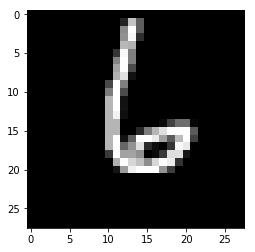

In [23]:
imageprepare(x,y)


from random import randint
img_num = randint(49000,69999)
filepath = 'E:/Pycharm Install/TensorflowProjects/Train/Images/test/'+str(img_num)+'.png'


img_ = imread(filepath, flatten=True)

predict = tf.argmax(output_layer, 1)
pred = predict.eval({x: img_.reshape(-1,data_img_shape)})
    
print ("Prediction of mnist test data  is: ", pred[0])
plt.imshow(img_, cmap='gray')
#plt.axis('off')
plt.show()